In [83]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np

#### Predict the price of house(y) according to independance variable(x) is a simple problem of linear regression
* dependant variable(y) is continuous ...

In [26]:
x = np.arange(-10, 10., 0.5)
y = np.arange(-10, 10., 0.5)
x.shape
y.shape
num = 30                                                               
x = np.linspace(5,25,num=num)
y = x+2*np.random.randn(num)
print(x.shape)
print(y.shape)

(30,)
(30,)


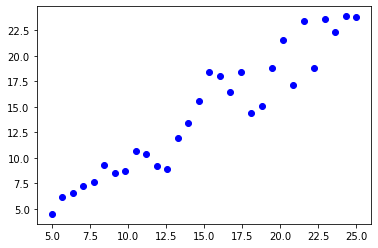

In [9]:
# rand(d0, d1, …, dn)	Random values in a given shape.
# randn(d0, d1, …, dn)	Return a sample (or samples) from the “standard normal” distribution.
# randint(low[, high, size, dtype])	Return random integers from low (inclusive) to high (exclusive).
# random_integers(low[, high, size])	Random integers of type np.int between low and high, inclusive.
# random_sample([size])	Return random floats in the half-open interval [0.0, 1.0).
# random([size])	Return random floats in the half-open interval [0.0, 1.0).
# ranf([size])	Return random floats in the half-open interval [0.0, 1.0).
# sample([size])	Return random floats in the half-open interval [0.0, 1.0).
# choice(a[, size, replace, p])	Generates a random sample from a given 1-D array
# bytes(length)	Return random bytes.
num = 30                                                               
x = np.linspace(5,25,num=num)
y = x+2*np.random.randn(num)
plt.scatter(x,y,c='b');

#### The simplest hypothesis for linear regression

## $$ h_\theta(x) = \theta_0 + \theta_1 x $$
* $ \theta_0 , \theta_1 $ are parameters which $ \theta_0 $ is intercept and $ \theta_1 $ is slope 
*we suppose x and y by random function

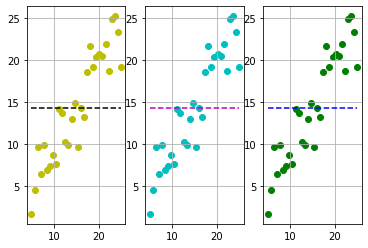

In [198]:
fig,ax = plt.subplots(1,3)
colors = list("rgbcmyk")
for i in ax.flatten():
    i.plot(x,y_1, color = colors.pop(),linestyle='--')
    i.scatter(x,y,color = colors.pop())
    i.grid()

In [196]:
y

array([ 1.63058998,  4.45409241,  9.60123097,  6.42877417,  9.88074914,
        6.91345685,  7.39487181,  8.65829681,  7.60407457, 14.18998595,
       13.69969675, 10.20926012,  9.82277563, 12.9503411 , 14.86596314,
        9.61372519, 14.23026022, 13.16454448, 18.57419932, 21.68480598,
       19.12316326, 20.37682172, 20.70337571, 20.52166113, 21.97949597,
       18.74418693, 24.89183255, 25.2403151 , 23.35618996, 19.22422132])

/Users/faezehghazi/Desktop/projects/env/lib/python3.9/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


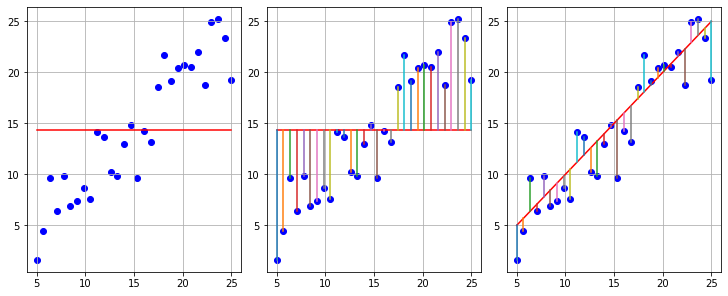

In [180]:
y_1 = np.ones_like(y) * y.mean()

fig = plt.figure(constrained_layout=True, figsize=(10,4))
grid = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(grid[0,0])
ax1 = fig.gca()
ax1.scatter(x,y,c='b');
ax1.plot(x,  y_1, color='r');
plt.grid()

ax2 = fig.add_subplot(grid[0,-2])
ax2.scatter(x,y,c='b');
ax2.plot(x,  y_1, color='r');
for i in range(x.shape[0]):
    plt.plot((x[i],x[i]),(y[i],y_1[i]))
plt.grid()

y_2 = x
ax3 = fig.add_subplot(grid[0,-1])
ax3.scatter(x,y,c='b');
ax3.plot(x,  y_2, color='r');
for i in range(x.shape[0]):
    plt.plot((x[i],x[i]),(y[i],y_2[i]))
plt.grid()

#### Error for one sample is the distance between each dot to line:    $ h_\theta(x) - y_i $
<font color="blue">  <b>COST FUNCTION</b> (Sumation of all squared errors) : </font>
### $$ J(\theta_0 , \theta_1)=  \frac{1}{2}\sum_{i=1}^n(h_\theta(x_i) - y_i)^2 $$

#### Lets draw the cost function

if  $ \theta_0=0 $

Then we have : $ h_\theta(x) = \theta_1 x_i $

if we calculate the cost function $\frac{1}{2}\sum_{i=1}^n(\theta_1 x_i  - y_i)^2 $ for different $\theta_1 $ and plot it, we have:

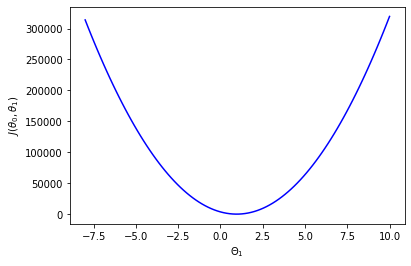

In [81]:
j=[]
theta_1=[]
theta = np.linspace(-8,10,num=100)
for t in theta:
    a = 0.5*np.sum((t*x - y)**2)
    j.append(a)
    theta_1.append(t)

plt.plot(theta_1,j, "b")
plt.xlabel(r'$\Theta_1$')
plt.ylabel(r'$J(\theta_0,\theta_1)$');

## Goal
#### In order to find a best hypothesis(line) we should minimize the cost function.
#### for minimizing the cost function we should find the best parameters

In [80]:
from matplotlib import animation, rc
rc('animation', html='html5')

In [70]:
def h(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

def mse(y_pred, y_true):
    return 0.5 * ((y_pred - y_true) ** 2).mean()

In [71]:
mu = x.mean()
sigma = x.std()
xn = (x - mu) / sigma  # normalization
print(xn)

[-1.67524673 -1.55971247 -1.44417822 -1.32864396 -1.2131097  -1.09757545
 -0.98204119 -0.86650693 -0.75097267 -0.63543842 -0.51990416 -0.4043699
 -0.28883564 -0.17330139 -0.05776713  0.05776713  0.17330139  0.28883564
  0.4043699   0.51990416  0.63543842  0.75097267  0.86650693  0.98204119
  1.09757545  1.2131097   1.32864396  1.44417822  1.55971247  1.67524673]


In [72]:
alpha = 5e-3  

# initialize parameters randomly
theta_0 = np.random.randn() 
theta_1 = np.random.randn()

print("Initial guess:")
print(" theta_0 = %.4f\n theta_1 = %.4f" %(theta_0, theta_1))

costs = []

def update_step():
    global theta_0, theta_1, costs
    
    # predict 
    y_pred = h(theta_0, theta_1, xn)
    costs.append(mse(y_pred, y))
    
    # compute gradients
    dtheta_0 = (y_pred - y)
    dtheta_1 = xn * dtheta_0
    
    # update parameters
    theta_0 -= alpha * dtheta_0.mean()
    theta_1 -= alpha * dtheta_1.mean()

Initial guess:
 theta_0 = -0.4933
 theta_1 = -0.8408


In [74]:
fig = plt.figure(dpi=100, figsize=(5, 3))

# plot data
plt.scatter(xn, y, s=30, marker='x')

# plot prediction (a line)
y_pred = h(theta_0, theta_1, xn)
line, = plt.plot(xn, y_pred, 'k')
plt.close()

def animate(i):
    line.set_ydata(h(theta_0, theta_1, xn))
    for i in range(100): update_step()
    return line,

anim = animation.FuncAnimation(fig, animate, np.arange(0, 20), interval=200, repeat_delay=1000)

In [75]:
anim

 theta_0 =   14.32
 theta_1 =    5.93


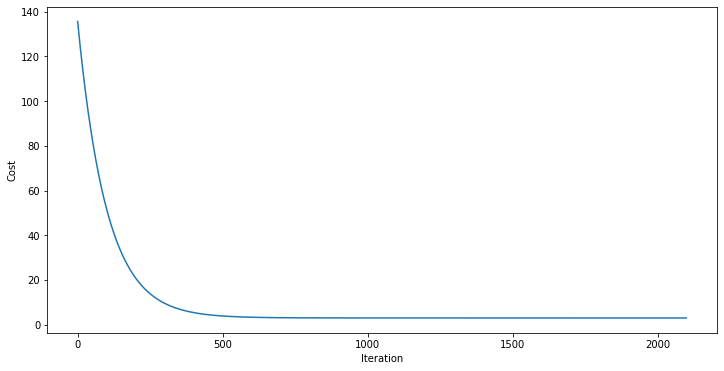

In [76]:
print(" theta_0 = %7.2f\n theta_1 = %7.2f" %(theta_0, theta_1))
plt.figure(figsize=(12, 6))
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

In [77]:
X, Y = np.meshgrid(xn, y_pred)
X.shape
# print(X)

(30, 30)

In [78]:
# Z = X ** 2 + Y ** 2
def fun(x, y):
    return x**2 + y**2
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)
Z.shape

(30, 30)

<ipython-input-79-9aba4c4a2957>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


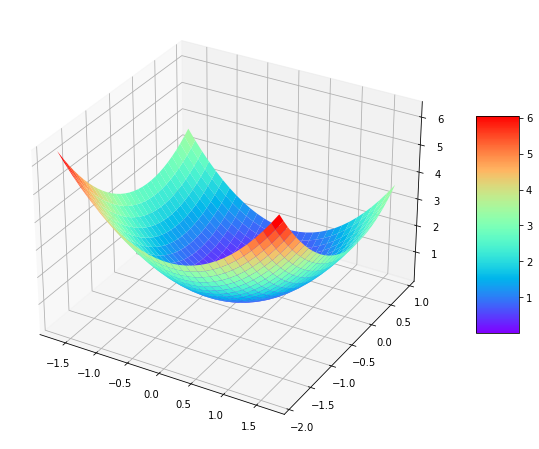

In [79]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [28]:
k=[]
vv=[]
theta = np.linspace(5,25,num=100)
c = np.ones_like(x)
for i in theta:
    a = 0.5*np.sum((i*c-y)**2)
    k.append(a)
    vv.append(i)

In [ ]:
plt.plot(v,k)
plt.xlabel('Theta_2')
plt.ylabel('cost Function  J(theta)');